## Data loading

In [7]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
test_filename = 'test.csv'
train_filename = 'train.csv'

train_dataset_raw = pd.read_csv(train_filename, sep=';',decimal='.',skiprows=[0], header=None,index_col=0, names=['Id', 'Bought_Product','Market_Segment','Online_Account','EnergyTariff','Sex','Age','Non_Energy_Product','How_many_other_contracts','Billing_Amount','District'])

train_dataset_raw.head()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
262,0,3,0.0,G12,M,22.0,0,0,9.0000,DistrictA
263,0,2,0.0,C12,M,29.0,1,0,27.7208,DistrictA
264,0,3,0.0,G12,M,18.0,0,0,7.7958,DistrictD
265,0,3,1.0,G12,M,40.5,0,0,7.7500,DistrictD
266,0,3,1.0,G12,M,22.0,0,0,8.0500,DistrictA


In [9]:
test_dataset_raw = pd.read_csv(test_filename, sep=';',decimal='.',skiprows=[0], header=None, index_col=0, names=['Id','Market_Segment','Online_Account','EnergyTariff','Sex','Age','Non_Energy_Product','How_many_other_contracts','Billing_Amount','District'])
test_dataset_raw.head()

,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,
1,3,0.0,C12,F,32.0,1,1,15.50,DistrictE
2,3,NaN,G12,F,17.0,4,2,7.93,DistrictB
3,2,NaN,C12,F,17.0,0,0,12.00,DistrictB
4,3,NaN,G12,F,22.0,0,0,7.75,DistrictB
5,3,0.0,G12,M,45.0,0,0,8.05,DistrictD


## Raw statistic

In [10]:
from statistics import mode

In [49]:
df = pd.DataFrame(test_dataset_raw)
df.mode()


,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
0,3,-1.0,13,1,22.0,0,0,7.9,4


In [12]:

mask_bought_product_raw = train_dataset_raw.loc[train_dataset_raw['Bought_Product'] == 1]

mode(mask_bought_product_raw['Sex']) #Female


'F'

In [13]:
mode(mask_bought_product_raw['Age']) #24

24.0

In [14]:
mode(mask_bought_product_raw['District']) #DistrictB

'DistrictB'

In [15]:
df = pd.DataFrame(mask_bought_product_raw)
df.mode()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
0,1.0,1,1.0,C12,F,24.0,0.0,0.0,13.0,DistrictB
1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN


## Data processing

In [16]:
train_dataset_fillnan = train_dataset_raw
train_dataset_fillnan.fillna(-1, inplace=True) # missing data as -1
train_dataset_fillnan.head()


,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
262,0,3,0.0,G12,M,22.0,0,0,9.0000,DistrictA
263,0,2,0.0,C12,M,29.0,1,0,27.7208,DistrictA
264,0,3,0.0,G12,M,18.0,0,0,7.7958,DistrictD
265,0,3,1.0,G12,M,40.5,0,0,7.7500,DistrictD
266,0,3,1.0,G12,M,22.0,0,0,8.0500,DistrictA


In [22]:
test_dataset_fillnan = test_dataset_raw
test_dataset_fillnan.fillna(-1, inplace=True) # missing data as -1
test_dataset_fillnan.head()

,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,
1,3,0.0,C12,F,32.0,1,1,15.50,DistrictE
2,3,-1.0,G12,F,17.0,4,2,7.93,DistrictB
3,2,-1.0,C12,F,17.0,0,0,12.00,DistrictB
4,3,-1.0,G12,F,22.0,0,0,7.75,DistrictB
5,3,0.0,G12,M,45.0,0,0,8.05,DistrictD


In [23]:
train_dataset_fillnan['EnergyTariff'].unique() # check unique classes to mapping (categorical to numeric)


array(['G12', 'C12', 'G11', -1], dtype=object)

In [24]:
train_dataset_fillnan['Sex'].unique()

array(['M', 'F'], dtype=object)

In [25]:
train_dataset_fillnan['District'].unique()


array(['DistrictA', 'DistrictD', 'DistrictB', 'DistrictE', 'DistrictC',
       -1], dtype=object)

In [26]:
categorical_to_binary_nums_energy = {"EnergyTariff": {"G11": 11, "G12": 12, "C12": 13}}
categorical_to_binary_nums_district = { "District": {"DistrictA": 1,"DistrictB": 2, "DistrictC": 3, "DistrictD": 4, "DistrictE":5}}
categorical_to_binary_nums_sex = {"Sex": {"M": 1, "F": 2}}

In [27]:
train_dataset_nums = train_dataset_fillnan

train_dataset_nums.replace(categorical_to_binary_nums_energy, inplace=True)
train_dataset_nums.replace(categorical_to_binary_nums_district, inplace=True)
train_dataset_nums.replace(categorical_to_binary_nums_sex, inplace=True)

train_dataset_nums.head()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
262,0,3,0.0,12,1,22.0,0,0,9.0000,1
263,0,2,0.0,13,1,29.0,1,0,27.7208,1
264,0,3,0.0,12,1,18.0,0,0,7.7958,4
265,0,3,1.0,12,1,40.5,0,0,7.7500,4
266,0,3,1.0,12,1,22.0,0,0,8.0500,1


In [28]:
test_dataset_nums = test_dataset_fillnan

test_dataset_nums.replace(categorical_to_binary_nums_energy, inplace=True)
test_dataset_nums.replace(categorical_to_binary_nums_district, inplace=True)
test_dataset_nums.replace(categorical_to_binary_nums_sex, inplace=True)

test_dataset_nums.head()

,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,
1,3,0.0,13,2,32.0,1,1,15.50,5
2,3,-1.0,12,2,17.0,4,2,7.93,2
3,2,-1.0,13,2,17.0,0,0,12.00,2
4,3,-1.0,12,2,22.0,0,0,7.75,2
5,3,0.0,12,1,45.0,0,0,8.05,4


In [29]:
train_dataset_nums.describe()


,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,0.383387,2.313099,-0.124601,12.206070,1.351438,29.291262,0.496805,0.364217,32.552948,2.773163
std,0.486600,0.822321,0.829729,2.144544,0.477801,15.318718,1.007566,0.782773,52.039595,1.490122
min,0.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,2.000000,-1.000000,12.000000,1.000000,20.000000,0.000000,0.000000,7.895800,2.000000
50%,0.000000,3.000000,0.000000,13.000000,1.000000,28.000000,0.000000,0.000000,13.825000,3.000000
75%,1.000000,3.000000,1.000000,13.000000,2.000000,37.000000,1.000000,0.000000,30.500000,4.000000
max,1.000000,3.000000,1.000000,13.000000,2.000000,112.000000,8.000000,5.000000,512.329200,5.000000


In [30]:
train_dataset_nums.dtypes # checking if data types are numeric

Bought_Product                int64
Market_Segment                int64
Online_Account              float64
EnergyTariff                  int64
Sex                           int64
Age                         float64
Non_Energy_Product            int64
How_many_other_contracts      int64
Billing_Amount              float64
District                      int64
dtype: object

In [31]:
test_dataset_nums.describe()

,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
count,261.000000,261.00000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2.287356,-0.13410,12.252874,1.360153,29.210115,0.593870,0.429119,30.470421,2.666667
std,0.871445,0.80457,2.109785,0.480967,15.827742,1.308185,0.863665,44.339654,1.619592
min,1.000000,-1.00000,-1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,-1.00000,12.000000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,3.000000,0.00000,13.000000,1.000000,27.000000,0.000000,0.000000,15.000000,3.000000
75%,3.000000,1.00000,13.000000,2.000000,38.000000,1.000000,1.000000,31.390000,4.000000
max,3.000000,1.00000,13.000000,2.000000,114.000000,8.000000,6.000000,512.330000,5.000000


In [32]:
test_dataset_nums.dtypes # checking if data types are numeric

Market_Segment                int64
Online_Account              float64
EnergyTariff                  int64
Sex                           int64
Age                         float64
Non_Energy_Product            int64
How_many_other_contracts      int64
Billing_Amount              float64
District                      int64
dtype: object

# Data visualization and conclusion

In [33]:
mask_bought_product = train_dataset_nums.loc[train_dataset_nums['Bought_Product'] == 1]
mask_bought_product.head()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
271,1,2,1.0,13,2,24.0,1,0,26.000,5
273,1,3,0.0,12,2,27.0,0,0,7.925,4
275,1,3,0.0,13,2,30.0,0,0,12.475,5
277,1,3,1.0,11,2,24.0,0,2,-1.000,2
280,1,3,-1.0,12,2,22.0,0,0,7.750,4


In [34]:
mask_bought_product_not = train_dataset_nums.loc[train_dataset_nums['Bought_Product'] == 0] # to comparison
mask_bought_product_not.head()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
262,0,3,0.0,12,1,22.0,0,0,9.0000,1
263,0,2,0.0,13,1,29.0,1,0,27.7208,1
264,0,3,0.0,12,1,18.0,0,0,7.7958,4
265,0,3,1.0,12,1,40.5,0,0,7.7500,4
266,0,3,1.0,12,1,22.0,0,0,8.0500,1


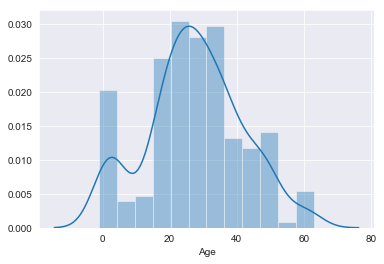

In [35]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(mask_bought_product['Age'])

#WNIOSEK najwięcej klientów kupujących produkt jest w przedziale wiekowym od 15 do 35 lat

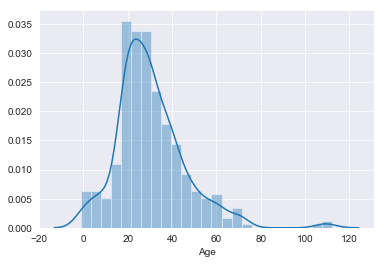

In [46]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(mask_bought_product_not['Age'])

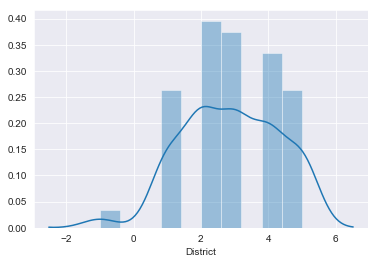

In [50]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(mask_bought_product['District'])


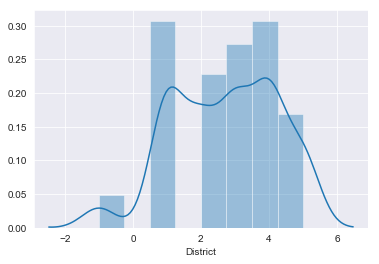

In [37]:

sns.set_style('darkgrid')
sns.distplot(mask_bought_product_not['District'])
#WNIOSEK miejsce zamieszkania nie ma znacznego wpływu na to czy produkt jest kupowany

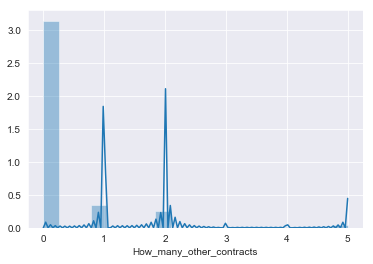

In [57]:
sns.set_style('darkgrid')
sns.distplot(mask_bought_product_not['How_many_other_contracts'])
# z przewagą dla mężczyzn (nie kupują)

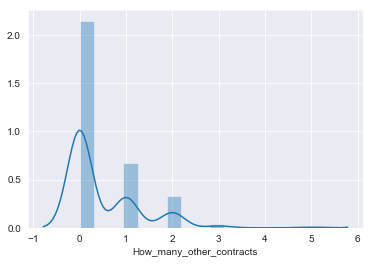

In [58]:
sns.set_style('darkgrid')
sns.distplot(mask_bought_product['How_many_other_contracts'])
# z przewagą dla kobiet (kupują)
# WNIOSEK kobiety częściej kupują produkt


# Writing and training model

In [40]:
train_dataset_nums.head()
 

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
262,0,3,0.0,12,1,22.0,0,0,9.0000,1
263,0,2,0.0,13,1,29.0,1,0,27.7208,1
264,0,3,0.0,12,1,18.0,0,0,7.7958,4
265,0,3,1.0,12,1,40.5,0,0,7.7500,4
266,0,3,1.0,12,1,22.0,0,0,8.0500,1


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

import statsmodels.api as sm

In [42]:
cols=['Market_Segment','Online_Account','EnergyTariff','Sex','Age','Non_Energy_Product','How_many_other_contracts','Billing_Amount']

X=train_dataset_nums[cols]
y=train_dataset_nums['Bought_Product']

logit_model=sm.Logit(y,X)

result=logit_model.fit()
print(result.summary2())




Optimization terminated successfully.
         Current function value: 0.425059
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.361     
Dependent Variable:    Bought_Product     AIC:                548.1733  
Date:                  2019-06-30 15:09   BIC:                583.6881  
No. Observations:      626                Log-Likelihood:     -266.09   
Df Model:              7                  LL-Null:            -416.73   
Df Residuals:          618                LLR p-value:        3.2235e-61
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Market_Segment           -1.1528   0.1468 -7.8543 0

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = logreg.predict(test_dataset_nums[cols])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
y_pred

Accuracy of logistic regression classifier on test set: 0.80


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)